# Random Forest  Project

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Loading the dataset

In [3]:
df3 = pd.read_csv('data.csv', sep=';')

In [4]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  4521 non-null   object
dtypes: object(1)
memory usage: 353.3+ KB
None


In [5]:
df3.describe()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
count,4521
unique,4521
top,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
freq,1


In [6]:
df3.isnull().sum()

age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    40690
dtype: int64

In [7]:
df3.fillna(0)

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."
...,...
45206,0
45207,0
45208,0
45209,0


In [8]:
df3.to_csv('data.csv', index=False)

In [9]:
df=pd.read_csv("data.csv", sep=";", quotechar='"')

In [10]:
df.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"30;""unemployed"";""married"";""primary"";""no"";1787;..."
1,"33;""services"";""married"";""secondary"";""no"";4789;..."
2,"35;""management"";""single"";""tertiary"";""no"";1350;..."
3,"30;""management"";""married"";""tertiary"";""no"";1476..."
4,"59;""blue-collar"";""married"";""secondary"";""no"";0;..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  4521 non-null   object
dtypes: object(1)
memory usage: 353.3+ KB


In [12]:
df.isnull()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,False
1,False
2,False
3,False
4,False
...,...
45206,True
45207,True
45208,True
45209,True


## Migrating data to PostgreSQL

In [13]:
pip install psycopg2

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [14]:
import psycopg2
import pandas as pd

# Load the CSV file into a DataFrame
csv_file = "data.csv"
df = pd.read_csv(csv_file, sep=';', quotechar='"')

# Database connection parameters
db_params = {
    "dbname": "postgres",
    "user": "postgres",
    "password": "rm#123456",
    "host": "localhost",
    "port": "5432"
}

# Connect to the PostgreSQL database
try:
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    print("Database connection successful.")
    
    # Create a table in the database
    create_table_query = """
    CREATE TABLE IF NOT EXISTS bank_data (
        age INT,
        job TEXT,
        marital TEXT,
        education TEXT,
        default_status TEXT,
        balance NUMERIC,
        housing TEXT,
        loan TEXT,
        contact TEXT,
        day INT,
        month TEXT,
        duration INT,
        campaign INT,
        pdays INT,
        previous INT,
        poutcome TEXT,
        y TEXT
    );
    """
    cursor.execute(create_table_query)
    conn.commit()
    print("Table created successfully.")
    
    # Insert data into the table
    for index, row in df.iterrows():
        insert_query = """
        INSERT INTO bank_data (age, job, marital, education, default_status, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
        """
        cursor.execute(insert_query, tuple(row))
    conn.commit()
    print("Data inserted successfully.")
    
except Exception as e:
    print(f"An error occurred: {e}")
finally:
    if conn:
        cursor.close()
        conn.close()
        print("Database connection closed.")

Database connection successful.
Table created successfully.
An error occurred: tuple index out of range
Database connection closed.


In [15]:
# Check the current dataframe columns to identify the problem
print("Current dataframe columns:")
print(df.columns.tolist())
print("\nDataframe shape:", df.shape)
print("\nFirst few rows:")
print(df.head())

Current dataframe columns:
['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"']

Dataframe shape: (45211, 1)

First few rows:
  age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
0  30;"unemployed";"married";"primary";"no";1787;...                                                                                                  
1  33;"services";"married";"secondary";"no";4789;...                                                                                                  
2  35;"management";"single";"tertiary";"no";1350;...                                                                                                  
3  30;"management";"married";"tertiary";"no";1476...                                                                                                  
4  59;"blue-collar"

In [16]:
# First, let's properly separate the columns in the CSV data
# We need to split the single column into 17 separate columns

# Get the column names from the header (first row, first column)
header_row = df.columns[0]
print("Header row:", header_row)

# Extract individual column names
# Remove the outer quotes and split by semicolon
column_names = []
parts = header_row.split(';')
for part in parts:
    # Clean up each part by removing quotes
    clean_part = part.strip().replace('"', '')
    if clean_part:
        column_names.append(clean_part)

print("Extracted column names:", column_names)
print("Number of columns:", len(column_names))

Header row: age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"
Extracted column names: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
Number of columns: 17


In [17]:
# Now let's parse each row and split the data properly
def parse_row(row_string):
    """Parse a single row string and return individual values"""
    # Remove any leading/trailing whitespace
    row_string = str(row_string).strip()
    
    # Split by semicolon
    parts = row_string.split(';')
    
    # Clean up each part
    cleaned_parts = []
    for part in parts:
        # Remove quotes and strip whitespace
        cleaned_part = part.strip().replace('"', '')
        cleaned_parts.append(cleaned_part)
    
    return cleaned_parts

# Apply this to all rows in the dataframe
print("Parsing rows...")
all_rows = []
for index, row in df.iterrows():
    row_data = parse_row(row.iloc[0])  # Get the single column value
    if len(row_data) == 17:  # Only include rows with correct number of columns
        all_rows.append(row_data)

print(f"Successfully parsed {len(all_rows)} rows")

# Create a new dataframe with properly separated columns
df_separated = pd.DataFrame(all_rows, columns=column_names)

print("\nNew dataframe info:")
print(df_separated.info())
print("\nFirst 5 rows:")
print(df_separated.head())

Parsing rows...
Successfully parsed 0 rows

New dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        0 non-null      object
 1   job        0 non-null      object
 2   marital    0 non-null      object
 3   education  0 non-null      object
 4   default    0 non-null      object
 5   balance    0 non-null      object
 6   housing    0 non-null      object
 7   loan       0 non-null      object
 8   contact    0 non-null      object
 9   day        0 non-null      object
 10  month      0 non-null      object
 11  duration   0 non-null      object
 12  campaign   0 non-null      object
 13  pdays      0 non-null      object
 14  previous   0 non-null      object
 15  poutcome   0 non-null      object
 16  y          0 non-null      object
dtypes: object(17)
memory usage: 132.0+ bytes
None

First 5 rows:
Empty DataFrame
Columns: [age, job, 

In [18]:
# Let's examine a single row more carefully
sample_row = df.iloc[0, 0]
print("Sample row:")
print(repr(sample_row))
print("\nLength:", len(sample_row))

# Try different parsing approaches
print("\nSplitting by semicolon:")
parts = sample_row.split(';')
print(f"Number of parts: {len(parts)}")
for i, part in enumerate(parts[:10]):  # Show first 10 parts
    print(f"Part {i}: {repr(part)}")

# Check if there are embedded semicolons within quoted strings
print(f"\nAll parts: {len(parts)}")
if len(parts) > 17:
    print("Too many parts - there might be semicolons within quoted strings")

Sample row:
'30;"unemployed";"married";"primary";"no";1787;"no";"no";"cellular";19;"oct";79;1;-1;0;"unknown";"no"58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"'

Length: 201

Splitting by semicolon:
Number of parts: 33
Part 0: '30'
Part 1: '"unemployed"'
Part 2: '"married"'
Part 3: '"primary"'
Part 4: '"no"'
Part 5: '1787'
Part 6: '"no"'
Part 7: '"no"'
Part 8: '"cellular"'
Part 9: '19'

All parts: 33
Too many parts - there might be semicolons within quoted strings


In [19]:
# Create a proper parser for the concatenated records
def parse_multiple_records_row(row_string):
    """Parse a row that contains multiple concatenated records"""
    # Split by semicolon
    parts = row_string.split(';')
    
    # Clean up each part
    cleaned_parts = []
    for part in parts:
        cleaned_part = part.strip().replace('"', '')
        cleaned_parts.append(cleaned_part)
    
    # Split into individual records (each record has 17 columns)
    records = []
    num_columns = 17
    
    # Process parts in chunks of 17
    i = 0
    while i + num_columns <= len(cleaned_parts):
        record = cleaned_parts[i:i + num_columns]
        records.append(record)
        i += num_columns
    
    return records

# Apply this to all rows in the dataframe
print("Parsing rows with multiple records...")
all_records = []

for index, row in df.iterrows():
    row_string = str(row.iloc[0]).strip()
    records = parse_multiple_records_row(row_string)
    
    for record in records:
        if len(record) == 17:  # Only include complete records
            all_records.append(record)

print(f"Successfully parsed {len(all_records)} records")

# Create a new dataframe with properly separated columns
df_clean = pd.DataFrame(all_records, columns=column_names)

print("\nCleaned dataframe info:")
print(df_clean.info())
print("\nFirst 5 rows:")
print(df_clean.head())
print("\nLast 5 rows:")
print(df_clean.tail())

Parsing rows with multiple records...
Successfully parsed 4521 records

Cleaned dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   object
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   object
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   object
 10  month      4521 non-null   object
 11  duration   4521 non-null   object
 12  campaign   4521 non-null   object
 13  pdays      4521 non-null   object
 14  previous   4521 non-null   object
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: object(17)
memory usage: 600.6+ KB
None

First 5

In [20]:
# Now let's fix the database insertion code using the properly separated data
import psycopg2

# Use the cleaned dataframe instead of the original df
df_for_db = df_clean.copy()

# Database connection parameters
db_params = {
    "dbname": "postgres",
    "user": "postgres", 
    "password": "rm#123456",
    "host": "localhost",
    "port": "5432"
}

try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    print("Database connection successful.")
    
    # Drop the table if it exists and create a new one with correct column name
    drop_table_query = "DROP TABLE IF EXISTS bank_data;"
    cursor.execute(drop_table_query)
    
    # Create a table in the database (note: using 'default_col' instead of 'default' which is a SQL keyword)
    create_table_query = """
    CREATE TABLE bank_data (
        age INT,
        job TEXT,
        marital TEXT,
        education TEXT,
        default_col TEXT,
        balance NUMERIC,
        housing TEXT,
        loan TEXT,
        contact TEXT,
        day INT,
        month TEXT,
        duration INT,
        campaign INT,
        pdays INT,
        previous INT,
        poutcome TEXT,
        y TEXT
    );
    """
    cursor.execute(create_table_query)
    conn.commit()
    print("Table created successfully.")
    
    # Insert data into the table
    insert_count = 0
    for index, row in df_for_db.iterrows():
        insert_query = """
        INSERT INTO bank_data (age, job, marital, education, default_col, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y)
        VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
        """
        cursor.execute(insert_query, tuple(row))
        insert_count += 1
        
        # Commit every 1000 rows for better performance
        if insert_count % 1000 == 0:
            conn.commit()
            print(f"Inserted {insert_count} rows...")
    
    # Final commit
    conn.commit()
    print(f"Data insertion completed successfully! Total rows inserted: {insert_count}")
    
except Exception as e:
    print(f"An error occurred: {e}")
    if conn:
        conn.rollback()
finally:
    if conn:
        cursor.close()
        conn.close()
        print("Database connection closed.")

Database connection successful.
Table created successfully.
Inserted 1000 rows...
Inserted 1000 rows...
Inserted 2000 rows...
Inserted 2000 rows...
Inserted 3000 rows...
Inserted 3000 rows...
Inserted 4000 rows...
Data insertion completed successfully! Total rows inserted: 4521
Database connection closed.
Inserted 4000 rows...
Data insertion completed successfully! Total rows inserted: 4521
Database connection closed.


In [21]:
# Retrieve data from the PostgreSQL database
import psycopg2
import pandas as pd

# Database connection parameters
db_params = {
    "dbname": "postgres",
    "user": "postgres", 
    "password": "rm#123456",
    "host": "localhost",
    "port": "5432"
}

try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    print("Database connection successful.")
    
    # Query to retrieve all data from the bank_data table
    select_query = "SELECT * FROM bank_data;"
    
    # Execute the query and fetch results
    cursor.execute(select_query)
    rows = cursor.fetchall()
    
    # Get column names from the cursor description
    column_names = [desc[0] for desc in cursor.description]
    
    # Create a DataFrame from the retrieved data
    retrieved_df = pd.DataFrame(rows, columns=column_names)
    
    print(f"Successfully retrieved {len(retrieved_df)} rows from the database.")
    print("\nDataFrame info:")
    print(retrieved_df.info())
    print("\nFirst 10 rows:")
    print(retrieved_df.head(10))
    print("\nLast 5 rows:")
    print(retrieved_df.tail())
    
    # Display some basic statistics
    print("\nBasic statistics:")
    print(f"Total records: {len(retrieved_df)}")
    print(f"Unique jobs: {retrieved_df['job'].nunique()}")
    print(f"Unique education levels: {retrieved_df['education'].nunique()}")
    print(f"Target variable distribution:")
    print(retrieved_df['y'].value_counts())
    
except Exception as e:
    print(f"An error occurred while retrieving data: {e}")
finally:
    if conn:
        cursor.close()
        conn.close()
        print("\nDatabase connection closed.")

Database connection successful.
Successfully retrieved 4521 rows from the database.

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          4521 non-null   int64 
 1   job          4521 non-null   object
 2   marital      4521 non-null   object
 3   education    4521 non-null   object
 4   default_col  4521 non-null   object
 5   balance      4521 non-null   object
 6   housing      4521 non-null   object
 7   loan         4521 non-null   object
 8   contact      4521 non-null   object
 9   day          4521 non-null   int64 
 10  month        4521 non-null   object
 11  duration     4521 non-null   int64 
 12  campaign     4521 non-null   int64 
 13  pdays        4521 non-null   int64 
 14  previous     4521 non-null   int64 
 15  poutcome     4521 non-null   object
 16  y            4521 non-null   object
dtypes: int64

In [22]:
# Clean up the retrieved data and fix any parsing issues
# Create a copy of the retrieved dataframe for cleaning
cleaned_retrieved_df = retrieved_df.copy()

# Fix the 'y' column by extracting only 'yes' or 'no'
cleaned_retrieved_df['y_clean'] = cleaned_retrieved_df['y'].str.extract(r'(yes|no)')[0]

# Display the cleaned target variable distribution
print("Cleaned target variable distribution:")
print(cleaned_retrieved_df['y_clean'].value_counts())

# Show some sample data to verify the cleaning
print("\nSample of original vs cleaned 'y' values:")
sample_comparison = cleaned_retrieved_df[['y', 'y_clean']].head(10)
print(sample_comparison)

# Convert numeric columns to proper data types
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
for col in numeric_columns:
    if col in cleaned_retrieved_df.columns:
        cleaned_retrieved_df[col] = pd.to_numeric(cleaned_retrieved_df[col], errors='coerce')

# Display final cleaned dataframe info
print("\nCleaned dataframe info:")
print(cleaned_retrieved_df.info())

# Display summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(cleaned_retrieved_df[numeric_columns].describe())

# Save the cleaned data to a new variable for further analysis
df_final_clean = cleaned_retrieved_df.copy()
print(f"\nData successfully retrieved and cleaned! Shape: {df_final_clean.shape}")

Cleaned target variable distribution:
y_clean
no     4000
yes     521
Name: count, dtype: int64

Sample of original vs cleaned 'y' values:
      y y_clean
0  no58      no
1  no44      no
2  no33      no
3  no47      no
4  no33      no
5  no35      no
6  no28      no
7  no42      no
8  no58      no
9  no43      no

Cleaned dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4521 non-null   int64  
 1   job          4521 non-null   object 
 2   marital      4521 non-null   object 
 3   education    4521 non-null   object 
 4   default_col  4521 non-null   object 
 5   balance      4521 non-null   float64
 6   housing      4521 non-null   object 
 7   loan         4521 non-null   object 
 8   contact      4521 non-null   object 
 9   day          4521 non-null   int64  
 10  month        4521 non-null   object 
 11  du

### SQL Queries for pgAdmin

Below are various SQL queries you can use in pgAdmin to explore your bank_data table:

In [23]:
# SQL Queries for pgAdmin - Copy these queries to use in pgAdmin

queries = {
    "1. Basic Data Overview": """
-- View first 10 rows of the table
SELECT * FROM bank_data LIMIT 10;
""",
    
    "2. Count Total Records": """
-- Count total number of records
SELECT COUNT(*) as total_records FROM bank_data;
""",
    
    "3. Table Structure": """
-- View table structure and column information
SELECT 
    column_name,
    data_type,
    is_nullable,
    column_default
FROM information_schema.columns 
WHERE table_name = 'bank_data'
ORDER BY ordinal_position;
""",
    
    "4. Target Variable Distribution": """
-- Distribution of target variable (y)
SELECT 
    SUBSTRING(y FROM 1 FOR 3) as y_clean,
    COUNT(*) as count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as percentage
FROM bank_data 
GROUP BY SUBSTRING(y FROM 1 FOR 3)
ORDER BY count DESC;
""",
    
    "5. Age Statistics": """
-- Age distribution statistics
SELECT 
    MIN(age) as min_age,
    MAX(age) as max_age,
    ROUND(AVG(age), 2) as avg_age,
    ROUND(STDDEV(age), 2) as std_age
FROM bank_data;
""",
    
    "6. Job Distribution": """
-- Distribution of job categories
SELECT 
    job,
    COUNT(*) as count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as percentage
FROM bank_data 
GROUP BY job 
ORDER BY count DESC;
""",
    
    "7. Education Levels": """
-- Distribution of education levels
SELECT 
    education,
    COUNT(*) as count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as percentage
FROM bank_data 
GROUP BY education 
ORDER BY count DESC;
""",
    
    "8. Marital Status": """
-- Distribution of marital status
SELECT 
    marital,
    COUNT(*) as count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as percentage
FROM bank_data 
GROUP BY marital 
ORDER BY count DESC;
""",
    
    "9. Balance Statistics": """
-- Balance distribution statistics
SELECT 
    MIN(balance::numeric) as min_balance,
    MAX(balance::numeric) as max_balance,
    ROUND(AVG(balance::numeric), 2) as avg_balance,
    ROUND(STDDEV(balance::numeric), 2) as std_balance
FROM bank_data;
""",
    
    "10. Campaign Contact Analysis": """
-- Analysis of campaign contacts
SELECT 
    contact,
    COUNT(*) as total_contacts,
    ROUND(AVG(duration), 2) as avg_duration,
    ROUND(AVG(campaign), 2) as avg_campaigns
FROM bank_data 
GROUP BY contact 
ORDER BY total_contacts DESC;
""",
    
    "11. Monthly Distribution": """
-- Distribution of contacts by month
SELECT 
    month,
    COUNT(*) as contacts,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as percentage
FROM bank_data 
GROUP BY month 
ORDER BY contacts DESC;
""",
    
    "12. Success Rate by Job": """
-- Success rate (yes responses) by job category
SELECT 
    job,
    COUNT(*) as total,
    SUM(CASE WHEN y LIKE 'yes%' THEN 1 ELSE 0 END) as yes_count,
    ROUND(
        SUM(CASE WHEN y LIKE 'yes%' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 
        2
    ) as success_rate_percent
FROM bank_data 
GROUP BY job 
ORDER BY success_rate_percent DESC;
""",
    
    "13. Advanced Filtering": """
-- Find high-value customers who said yes
SELECT 
    age, job, education, balance, duration, y
FROM bank_data 
WHERE balance::numeric > 1000 
    AND y LIKE 'yes%'
    AND duration > 200
ORDER BY balance::numeric DESC
LIMIT 20;
""",
    
    "14. Data Quality Check": """
-- Check for any data quality issues
SELECT 
    'Missing age' as issue, COUNT(*) as count FROM bank_data WHERE age IS NULL
UNION ALL
SELECT 
    'Missing job' as issue, COUNT(*) as count FROM bank_data WHERE job IS NULL OR job = ''
UNION ALL
SELECT 
    'Invalid balance' as issue, COUNT(*) as count FROM bank_data WHERE balance !~ '^-?[0-9]+$'
UNION ALL
SELECT 
    'Invalid duration' as issue, COUNT(*) as count FROM bank_data WHERE duration < 0;
""",
    
    "15. Summary Report": """
-- Comprehensive summary report
SELECT 
    'Total Records' as metric, COUNT(*)::text as value FROM bank_data
UNION ALL
SELECT 
    'Unique Jobs', COUNT(DISTINCT job)::text FROM bank_data
UNION ALL
SELECT 
    'Unique Education Levels', COUNT(DISTINCT education)::text FROM bank_data
UNION ALL
SELECT 
    'Success Rate %', 
    ROUND(
        SUM(CASE WHEN y LIKE 'yes%' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 
        2
    )::text 
FROM bank_data
UNION ALL
SELECT 
    'Avg Age', ROUND(AVG(age), 1)::text FROM bank_data
UNION ALL
SELECT 
    'Avg Balance', ROUND(AVG(balance::numeric), 2)::text FROM bank_data;
"""
}

# Print all queries with descriptions
print("SQL QUERIES FOR pgAdmin")
print("=" * 50)
print()

for title, query in queries.items():
    print(f"{title}")
    print("-" * len(title))
    print(query)
    print()

print("📋 INSTRUCTIONS:")
print("1. Open pgAdmin and connect to your PostgreSQL database")
print("2. Navigate to your 'postgres' database")
print("3. Open the Query Tool (Tools > Query Tool)")
print("4. Copy and paste any of the above queries")
print("5. Click Execute (F5) to run the query")
print()
print("💡 TIP: Start with queries 1-3 for basic overview, then explore specific analyses!")

SQL QUERIES FOR pgAdmin

1. Basic Data Overview
----------------------

-- View first 10 rows of the table
SELECT * FROM bank_data LIMIT 10;


2. Count Total Records
----------------------

-- Count total number of records
SELECT COUNT(*) as total_records FROM bank_data;


3. Table Structure
------------------

-- View table structure and column information
SELECT 
    column_name,
    data_type,
    is_nullable,
    column_default
FROM information_schema.columns 
WHERE table_name = 'bank_data'
ORDER BY ordinal_position;


4. Target Variable Distribution
-------------------------------

-- Distribution of target variable (y)
SELECT 
    SUBSTRING(y FROM 1 FOR 3) as y_clean,
    COUNT(*) as count,
    ROUND(COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (), 2) as percentage
FROM bank_data 
GROUP BY SUBSTRING(y FROM 1 FOR 3)
ORDER BY count DESC;


5. Age Statistics
-----------------

-- Age distribution statistics
SELECT 
    MIN(age) as min_age,
    MAX(age) as max_age,
    ROUND(AVG(age), 2) as

## EDA on data

In [24]:
# Load data from PostgreSQL database into a DataFrame named 'df'
import psycopg2
import pandas as pd

# Database connection parameters
db_params = {
    "dbname": "postgres",
    "user": "postgres", 
    "password": "rm#123456",
    "host": "localhost",
    "port": "5432"
}

try:
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(**db_params)
    cursor = conn.cursor()
    print("Database connection successful.")
    
    # Query to retrieve all data from the bank_data table
    select_query = "SELECT * FROM bank_data;"
    
    # Load data directly into DataFrame named 'df'
    df = pd.read_sql_query(select_query, conn)
    
    # Clean the target variable 'y' to extract only 'yes' or 'no'
    df['y_clean'] = df['y'].str.extract(r'(yes|no)')[0]
    
    # Convert numeric columns to proper data types
    numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    print(f"Successfully loaded {len(df)} rows into DataFrame 'df'")
    print(f"DataFrame shape: {df.shape}")
    print("\nDataFrame info:")
    print(df.info())
    print("\nFirst 5 rows:")
    print(df.head())
    print("\nTarget variable distribution:")
    print(df['y_clean'].value_counts())
    
except Exception as e:
    print(f"An error occurred while loading data: {e}")
finally:
    if conn:
        cursor.close()
        conn.close()
        print("\nDatabase connection closed.")

Database connection successful.
Successfully loaded 4521 rows into DataFrame 'df'
DataFrame shape: (4521, 18)

DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4521 non-null   int64  
 1   job          4521 non-null   object 
 2   marital      4521 non-null   object 
 3   education    4521 non-null   object 
 4   default_col  4521 non-null   object 
 5   balance      4521 non-null   float64
 6   housing      4521 non-null   object 
 7   loan         4521 non-null   object 
 8   contact      4521 non-null   object 
 9   day          4521 non-null   int64  
 10  month        4521 non-null   object 
 11  duration     4521 non-null   int64  
 12  campaign     4521 non-null   int64  
 13  pdays        4521 non-null   int64  
 14  previous     4521 non-null   int64  
 15  poutcome     4521 non-null   object 
 16  y    

C:\Users\Raghav\AppData\Local\Temp\ipykernel_25116\173012878.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(select_query, conn)


In [25]:
df.head()

,age,job,marital,education,default_col,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_clean
0,30,unemployed,married,primary,no,1787.0,no,no,cellular,19,oct,79,1,-1,0,unknown,no58,no
1,33,services,married,secondary,no,4789.0,yes,yes,cellular,11,may,220,1,339,4,failure,no44,no
2,35,management,single,tertiary,no,1350.0,yes,no,cellular,16,apr,185,1,330,1,failure,no33,no
3,30,management,married,tertiary,no,1476.0,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no47,no
4,59,blue-collar,married,secondary,no,0.0,yes,no,unknown,5,may,226,1,-1,0,unknown,no33,no


In [26]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          4521 non-null   int64  
 1   job          4521 non-null   object 
 2   marital      4521 non-null   object 
 3   education    4521 non-null   object 
 4   default_col  4521 non-null   object 
 5   balance      4521 non-null   float64
 6   housing      4521 non-null   object 
 7   loan         4521 non-null   object 
 8   contact      4521 non-null   object 
 9   day          4521 non-null   int64  
 10  month        4521 non-null   object 
 11  duration     4521 non-null   int64  
 12  campaign     4521 non-null   int64  
 13  pdays        4521 non-null   int64  
 14  previous     4521 non-null   int64  
 15  poutcome     4521 non-null   object 
 16  y            4521 non-null   object 
 17  y_clean      4521 non-null   object 
dtypes: float64(1), int64(6), object(11)
memory usage

In [28]:

numeric_median = df[numeric_columns].median()
print(numeric_median)

age          39.0
balance     444.0
day          16.0
duration    185.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64


In [29]:
numeric_mean=df[numeric_columns].mean()
print(numeric_mean)

age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64


In [30]:
numeric_mode = df[numeric_columns].mode()
print(numeric_mode)

   age  balance  day  duration  campaign  pdays  previous
0   34      0.0   20       123         1     -1         0


In [31]:
std_deviation = df[numeric_columns].std()
print(std_deviation)


age           10.576211
balance     3009.638142
day            8.247667
duration     259.856633
campaign       3.109807
pdays        100.121124
previous       1.693562
dtype: float64


In [32]:

correlation_matrix = df[numeric_columns].corr()
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


In [33]:
unique_jobs = df['job'].nunique()
print(f"Number of unique job categories: {unique_jobs}")

Number of unique job categories: 12


In [34]:
unique_age = df['age'].nunique()
print(f"Number of unique age values: {unique_age}")

Number of unique age values: 67


In [35]:
unique_duration = df['duration'].nunique()
print(f"Number of unique duration values: {unique_duration}")

Number of unique duration values: 875


In [36]:
correlation_age_balance = df['age'].corr(df['balance'])
print(f"Correlation between age and balance: {correlation_age_balance}")

Correlation between age and balance: 0.08382014224477764


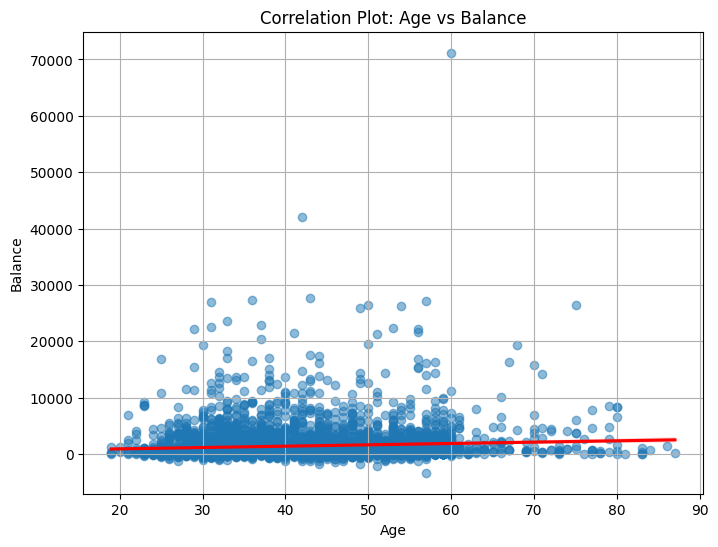

In [37]:
# Correlation plot between age and balance
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='balance', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation Plot: Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

In [38]:
correlation_age_duration = df['age'].corr(df['duration'])
print(f"Correlation between age and loan: {correlation_age_duration}")

Correlation between age and loan: -0.002366889451252148


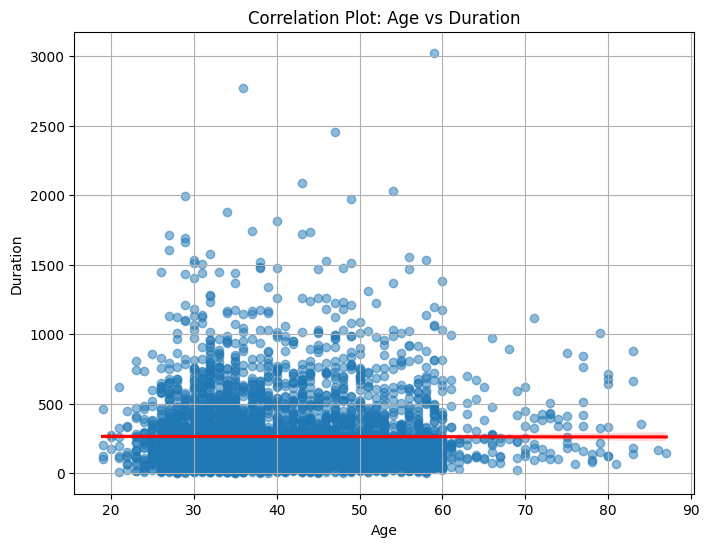

In [39]:
# Correlation plot between age and balance
plt.figure(figsize=(8, 6))
sns.regplot(x='age', y='duration', data=df, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Correlation Plot: Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.grid(True)
plt.show()

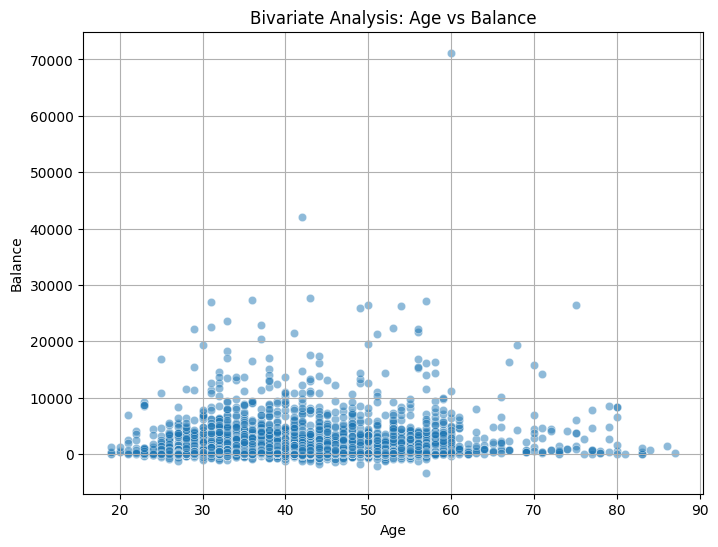

Correlation coefficient between age and balance: 0.08382014224477764


In [40]:
# Scatter plot for bivariate analysis between age and balance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='balance', data=df, alpha=0.5)
plt.title('Bivariate Analysis: Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

# Calculate and display the correlation coefficient
correlation_age_balance = df['age'].corr(df['balance'])
print(f"Correlation coefficient between age and balance: {correlation_age_balance}")

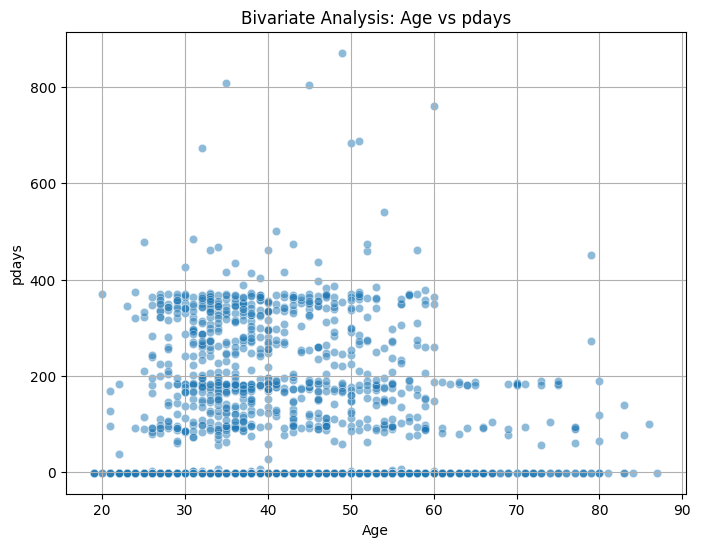

Correlation coefficient between age and pdays: -0.00889353033156625


In [41]:
# Scatter plot for bivariate analysis between age and balance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='pdays', data=df, alpha=0.5)
plt.title('Bivariate Analysis: Age vs pdays')
plt.xlabel('Age')
plt.ylabel('pdays')
plt.grid(True)
plt.show()

# Calculate and display the correlation coefficient
correlation_age_pdays = df['age'].corr(df['pdays'])
print(f"Correlation coefficient between age and pdays: {correlation_age_pdays}")

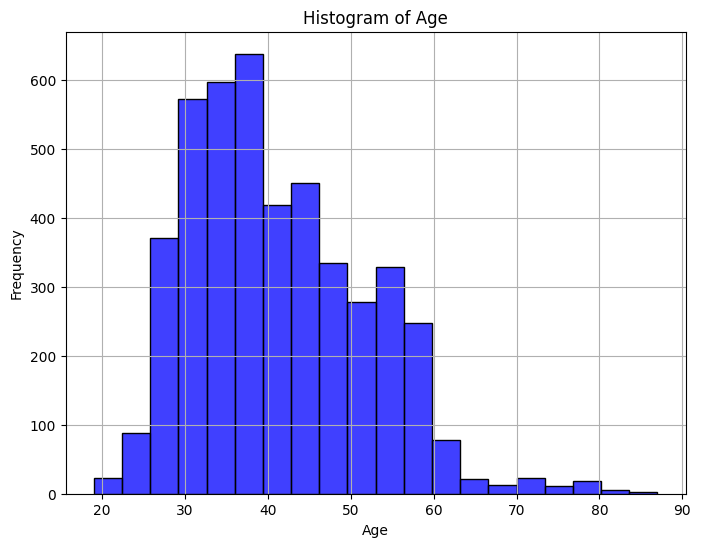

In [42]:
# Histogram of the age column
plt.figure(figsize=(8, 6))
sns.histplot(df['age'], bins=20, kde=False, color='blue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

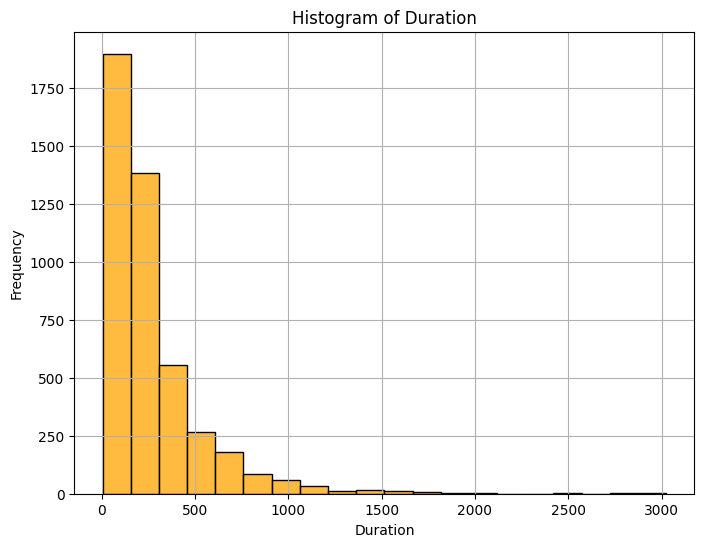

In [43]:
# Histogram of the duration column
plt.figure(figsize=(8, 6))
sns.histplot(df['duration'], bins=20, kde=False, color='orange')
plt.title('Histogram of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Building the Model

In [44]:
# data preprocessing

missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
age            0
job            0
marital        0
education      0
default_col    0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
y_clean        0
dtype: int64


In [45]:
# Perform one-hot encoding on all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print("One-hot encoding completed.")
print(f"Shape of the dataframe after encoding: {df_encoded.shape}")
print(df_encoded.head())

One-hot encoding completed.
Shape of the dataframe after encoding: (4521, 125)
   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   30   1787.0   19        79         1     -1         0            False   
1   33   4789.0   11       220         1    339         4            False   
2   35   1350.0   16       185         1    330         1            False   
3   30   1476.0    3       199         4     -1         0            False   
4   59      0.0    5       226         1     -1         0             True   

   job_entrepreneur  job_housemaid  ...  y_yes53  y_yes54  y_yes55  y_yes56  \
0             False          False  ...    False    False    False    False   
1             False          False  ...    False    False    False    False   
2             False          False  ...    False    False    False    False   
3             False          False  ...    False    False    False    False   
4             False          False  ...    False    False

In [46]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,y_yes53,y_yes54,y_yes55,y_yes56,y_yes57,y_yes58,y_yes59,y_yes60,y_yes61,y_clean_yes
0,30,1787.0,19,79,1,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,33,4789.0,11,220,1,339,4,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,35,1350.0,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476.0,3,199,4,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,59,0.0,5,226,1,-1,0,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
# train test split 


X = df_encoded.drop(columns=['y_clean_yes'])  
y = df_encoded['y_clean_yes'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Train-test split completed.")
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

Train-test split completed.
Training set shape: X_train: (3164, 124), y_train: (3164,)
Testing set shape: X_test: (1357, 124), y_test: (1357,)


In [48]:
# Building the Random Forest model

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create Random Forest classifier
rf_model = RandomForestClassifier(
    n_estimators=100,        # Number of trees in the forest
    random_state=42,         # For reproducibility
    max_depth=10,           # Maximum depth of the tree
    min_samples_split=5,    # Minimum number of samples required to split an internal node
    min_samples_leaf=2,     # Minimum number of samples required to be at a leaf node
    n_jobs=-1               # Use all available processors
)



In [49]:

# Train the model

rf_model.fit(X_train, y_train)
print("Model training completed!")

# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class

print("Predictions completed!")
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Model parameters: {rf_model.get_params()}")

Model training completed!
Predictions completed!
Training set size: 3164
Test set size: 1357
Number of features: 124
Model parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [50]:
# Model Evaluation and Prediction Analysis

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Display classification report
print("\n" + "="*50)
print("CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))



Model Accuracy: 0.9116 (91.16%)

CLASSIFICATION REPORT
              precision    recall  f1-score   support

          No       0.91      1.00      0.95      1205
         Yes       1.00      0.21      0.35       152

    accuracy                           0.91      1357
   macro avg       0.95      0.61      0.65      1357
weighted avg       0.92      0.91      0.88      1357




CONFUSION MATRIX
[[1205    0]
 [ 120   32]]


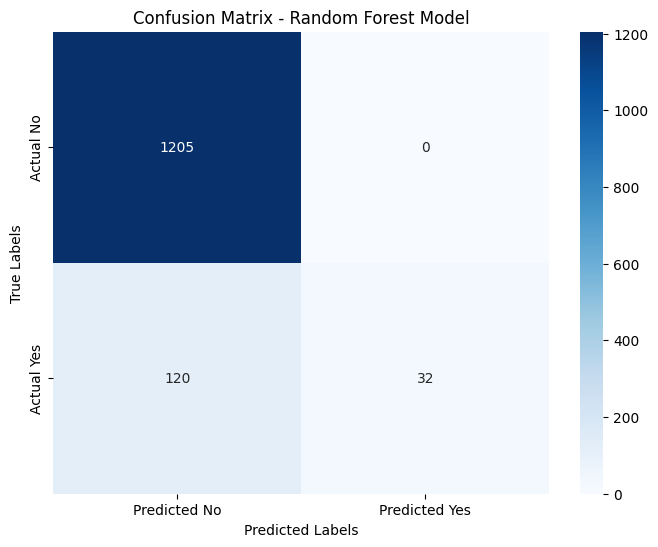

In [51]:
# Display confusion matrix
print("\n" + "="*50)
print("CONFUSION MATRIX")
print("="*50)
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['Predicted No', 'Predicted Yes'],
           yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Random Forest Model')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [52]:
# Calculate additional metrics
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nAdditional Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


Additional Metrics:
Precision: 1.0000
Recall: 0.2105
F1-Score: 0.3478


In [53]:
# Feature Importance Analysis

# Get feature importance from the Random Forest model
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("TOP 15 MOST IMPORTANT FEATURES:")
print("=" * 40)
print(feature_importance.head(15))



TOP 15 MOST IMPORTANT FEATURES:
              feature  importance
3            duration    0.177498
40   poutcome_success    0.083091
93            y_yes31    0.058643
94            y_yes32    0.041234
108           y_yes46    0.035470
102           y_yes40    0.035387
104           y_yes42    0.029545
99            y_yes37    0.025761
97            y_yes35    0.025198
106           y_yes44    0.025197
103           y_yes41    0.024731
96            y_yes34    0.024619
98            y_yes36    0.023704
107           y_yes45    0.022456
5               pdays    0.020747


C:\Users\Raghav\AppData\Local\Temp\ipykernel_25116\1218234295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')


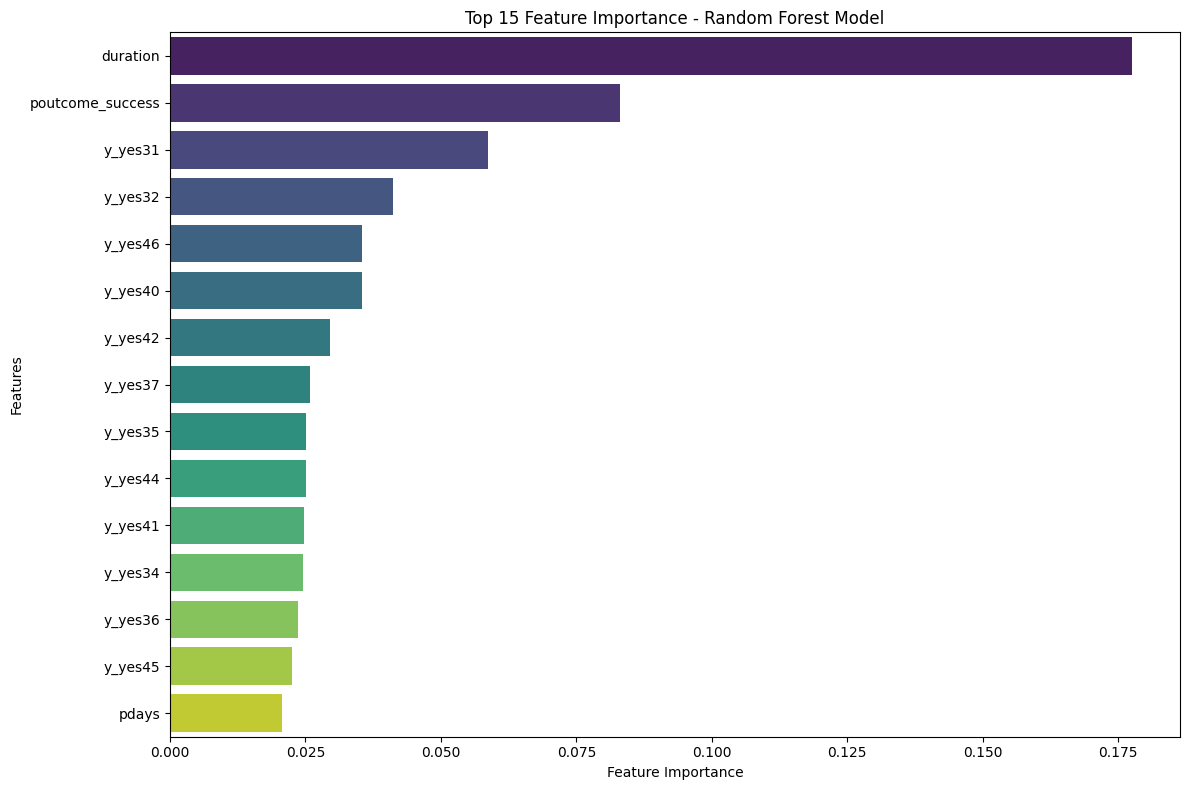


Total number of features used: 124
Sum of all feature importances: 1.0000


In [54]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
top_features = feature_importance.head(15)
sns.barplot(data=top_features, x='importance', y='feature', palette='viridis')
plt.title('Top 15 Feature Importance - Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

# Display total number of features
print(f"\nTotal number of features used: {len(feature_importance)}")
print(f"Sum of all feature importances: {feature_importance['importance'].sum():.4f}")

In [55]:
# ROC Curve and AUC Analysis

from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)



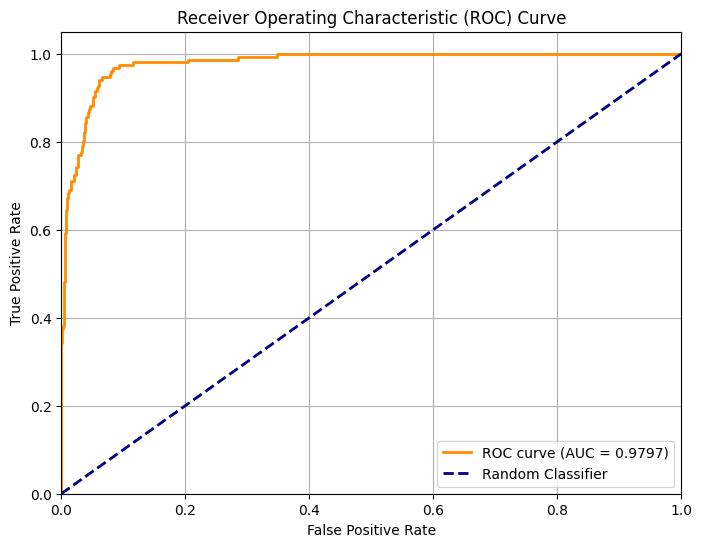

In [56]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()



In [57]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC Score: {auc_score:.4f}")

# Interpretation of AUC score
if auc_score >= 0.9:
    interpretation = "Excellent"
elif auc_score >= 0.8:
    interpretation = "Good"
elif auc_score >= 0.7:
    interpretation = "Fair"
elif auc_score >= 0.6:
    interpretation = "Poor"
else:
    interpretation = "Very Poor"
    
print(f"Model Performance: {interpretation}")

AUC Score: 0.9797
Model Performance: Excellent


In [58]:
# Prediction Analysis and Sample Results

# Create a summary of predictions
prediction_summary = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred,
    'Probability': y_pred_proba
})

print("PREDICTION SUMMARY")
print("=" * 30)
print(f"Total test samples: {len(y_test)}")
print(f"Correctly predicted: {sum(y_test == y_pred)}")
print(f"Incorrectly predicted: {sum(y_test != y_pred)}")
print(f"Accuracy: {accuracy:.4f}")


PREDICTION SUMMARY
Total test samples: 1357
Correctly predicted: 1237
Incorrectly predicted: 120
Accuracy: 0.9116


In [59]:
# Show some example predictions
print("\nSAMPLE PREDICTIONS (First 20 test cases):")
print("=" * 50)
sample_predictions = prediction_summary.head(20).copy()
sample_predictions['Correct'] = sample_predictions['Actual'] == sample_predictions['Predicted']
print(sample_predictions)

# Analyze prediction confidence
print("\nPREDICTION CONFIDENCE ANALYSIS:")
print("=" * 35)
high_confidence = (y_pred_proba >= 0.8) | (y_pred_proba <= 0.2)
medium_confidence = ((y_pred_proba >= 0.6) & (y_pred_proba < 0.8)) | ((y_pred_proba > 0.2) & (y_pred_proba <= 0.4))
low_confidence = (y_pred_proba > 0.4) & (y_pred_proba < 0.6)

print(f"High confidence predictions (>80% or <20%): {sum(high_confidence)} ({sum(high_confidence)/len(y_test)*100:.1f}%)")
print(f"Medium confidence predictions (60-80% or 20-40%): {sum(medium_confidence)} ({sum(medium_confidence)/len(y_test)*100:.1f}%)")
print(f"Low confidence predictions (40-60%): {sum(low_confidence)} ({sum(low_confidence)/len(y_test)*100:.1f}%)")




SAMPLE PREDICTIONS (First 20 test cases):
    Actual  Predicted  Probability  Correct
0    False      False     0.047755     True
1    False      False     0.132858     True
2    False      False     0.050876     True
3    False      False     0.051196     True
4    False      False     0.058475     True
5    False      False     0.069536     True
6    False      False     0.055818     True
7    False      False     0.108815     True
8    False      False     0.052075     True
9    False      False     0.102824     True
10   False      False     0.056196     True
11   False      False     0.053235     True
12    True      False     0.384430    False
13   False      False     0.442042     True
14   False      False     0.060445     True
15   False      False     0.052435     True
16    True      False     0.193354    False
17   False      False     0.050657     True
18   False      False     0.053192     True
19   False      False     0.048586     True

PREDICTION CONFIDENCE ANALYSIS:


In [60]:
# Accuracy by confidence level
high_conf_accuracy = accuracy_score(y_test[high_confidence], y_pred[high_confidence]) if sum(high_confidence) > 0 else 0
medium_conf_accuracy = accuracy_score(y_test[medium_confidence], y_pred[medium_confidence]) if sum(medium_confidence) > 0 else 0
low_conf_accuracy = accuracy_score(y_test[low_confidence], y_pred[low_confidence]) if sum(low_confidence) > 0 else 0

print(f"\nAccuracy by confidence level:")
print(f"High confidence accuracy: {high_conf_accuracy:.4f}")
print(f"Medium confidence accuracy: {medium_conf_accuracy:.4f}")
print(f"Low confidence accuracy: {low_conf_accuracy:.4f}")


Accuracy by confidence level:
High confidence accuracy: 0.9870
Medium confidence accuracy: 0.5000
Low confidence accuracy: 0.4487


## Hyperparameter Tuning and Model Optimization

Now let's optimize our Random Forest model using various hyperparameter tuning techniques to achieve the best possible performance.

In [61]:
# Hyperparameter Tuning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
import time

print("HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV")
print("=" * 50)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': [10, 15, 20, 25, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
    'max_leaf_nodes': [None, 50, 100, 200],
    'min_impurity_decrease': uniform(0.0, 0.1)
}

# Create Random Forest classifier for tuning
rf_random = RandomForestClassifier(random_state=42, n_jobs=-1)

print("Starting RandomizedSearchCV optimization...")
print(f"Number of parameter combinations to test: 150")

start_time = time.time()

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=rf_random,
    param_distributions=param_dist,
    n_iter=150,             # Number of parameter settings sampled
    cv=5,                   # 5-fold cross-validation
    scoring='roc_auc',      # Optimize for AUC score
    n_jobs=-1,             # Use all available cores
    verbose=1,             # Show progress
    random_state=42,
    return_train_score=True
)

# Fit the randomized search
random_search.fit(X_train, y_train)

end_time = time.time()
print(f"\nRandomizedSearchCV completed in {end_time - start_time:.2f} seconds")

# Display best parameters and score
print("\nBEST PARAMETERS FROM RANDOMIZEDSEARCHCV:")
print("=" * 45)
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nBest Cross-Validation AUC Score: {random_search.best_score_:.4f}")
print(f"Best Training AUC Score: {random_search.cv_results_['mean_train_score'][random_search.best_index_]:.4f}")

# Get the best model
best_rf_tuned = random_search.best_estimator_

# Display top 5 parameter combinations
print("\nTOP 5 PARAMETER COMBINATIONS:")
print("=" * 35)
results_df = pd.DataFrame(random_search.cv_results_)
top_5 = results_df.nlargest(5, 'mean_test_score')[['mean_test_score', 'std_test_score', 'params']]
for i, (idx, row) in enumerate(top_5.iterrows(), 1):
    print(f"{i}. AUC: {row['mean_test_score']:.4f} (+/- {row['std_test_score']*2:.4f})")
    print(f"   Parameters: {row['params']}")

HYPERPARAMETER TUNING WITH RANDOMIZEDSEARCHCV
Starting RandomizedSearchCV optimization...
Number of parameter combinations to test: 150
Fitting 5 folds for each of 150 candidates, totalling 750 fits

RandomizedSearchCV completed in 126.50 seconds

BEST PARAMETERS FROM RANDOMIZEDSEARCHCV:
bootstrap: True
max_depth: 25
max_features: sqrt
max_leaf_nodes: 50
min_impurity_decrease: 0.0012203072318044518
min_samples_leaf: 3
min_samples_split: 5
n_estimators: 391

Best Cross-Validation AUC Score: 0.9760
Best Training AUC Score: 0.9868

TOP 5 PARAMETER COMBINATIONS:
1. AUC: 0.9760 (+/- 0.0099)
   Parameters: {'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'min_impurity_decrease': np.float64(0.0012203072318044518), 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 391}
2. AUC: 0.9617 (+/- 0.0246)
   Parameters: {'bootstrap': True, 'max_depth': 25, 'max_features': None, 'max_leaf_nodes': 200, 'min_impurity_decrease': np.float64(0.001658782892785615

RANDOMIZEDSEARCHCV MODEL EVALUATION
OPTIMIZED MODEL PERFORMANCE:
------------------------------
Accuracy: 0.9197
Precision: 1.0000
Recall: 0.2829
F1-Score: 0.4410
AUC Score: 0.9806


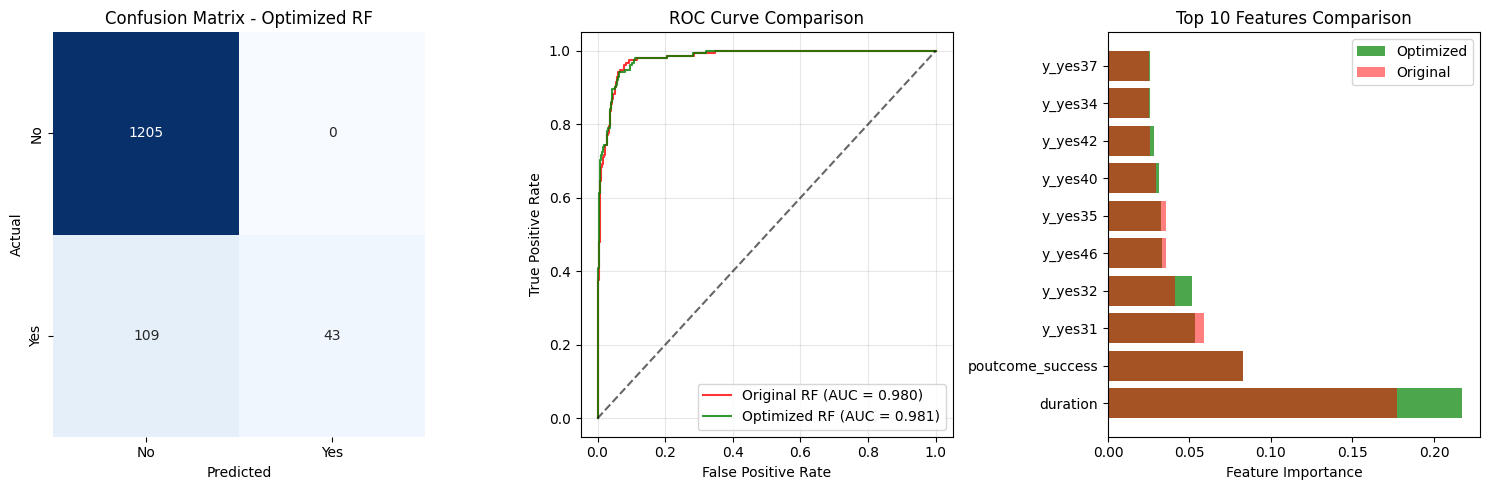


PERFORMACE IMPROVEMENT:
-------------------------
Accuracy improvement: 0.0081
AUC improvement: 0.0009
F1-Score improvement: 0.0932

MODEL COMPLEXITY:
------------------
Number of trees: 391
Max depth: 25
Min samples split: 5
Min samples leaf: 3


In [63]:
# Comprehensive Model Evaluation - RandomizedSearchCV Results
print("RANDOMIZEDSEARCHCV MODEL EVALUATION")
print("=" * 40)

# Get the best model from RandomizedSearchCV
best_rf_random = random_search.best_estimator_

# Make predictions with the optimized model
y_pred_random = best_rf_random.predict(X_test)
y_pred_proba_random = best_rf_random.predict_proba(X_test)[:, 1]

# Calculate comprehensive metrics
random_search_accuracy = accuracy_score(y_test, y_pred_random)
random_search_precision = precision_score(y_test, y_pred_random)
random_search_recall = recall_score(y_test, y_pred_random)
random_search_f1 = f1_score(y_test, y_pred_random)
random_search_auc = roc_auc_score(y_test, y_pred_proba_random)

print("OPTIMIZED MODEL PERFORMANCE:")
print("-" * 30)
print(f"Accuracy: {random_search_accuracy:.4f}")
print(f"Precision: {random_search_precision:.4f}")
print(f"Recall: {random_search_recall:.4f}")
print(f"F1-Score: {random_search_f1:.4f}")
print(f"AUC Score: {random_search_auc:.4f}")

# Confusion Matrix
cm_random = confusion_matrix(y_test, y_pred_random)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.heatmap(cm_random, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title('Confusion Matrix - Optimized RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# ROC Curve Comparison
plt.subplot(1, 3, 2)
fpr_orig, tpr_orig, _ = roc_curve(y_test, y_pred_proba)
fpr_opt, tpr_opt, _ = roc_curve(y_test, y_pred_proba_random)

plt.plot(fpr_orig, tpr_orig, label=f'Original RF (AUC = {auc_score:.3f})', color='red', alpha=0.8)
plt.plot(fpr_opt, tpr_opt, label=f'Optimized RF (AUC = {random_search_auc:.3f})', color='green', alpha=0.8)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Feature Importance Comparison
plt.subplot(1, 3, 3)
feature_imp_orig = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

feature_imp_opt = pd.DataFrame({
    'feature': X.columns, 
    'importance': best_rf_random.feature_importances_
}).sort_values('importance', ascending=False).head(10)

x_pos = np.arange(len(feature_imp_opt))
plt.barh(x_pos, feature_imp_opt['importance'], alpha=0.7, color='green', label='Optimized')
plt.barh(x_pos, feature_imp_orig['importance'], alpha=0.5, color='red', label='Original')
plt.yticks(x_pos, feature_imp_opt['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Features Comparison')
plt.legend()

plt.tight_layout()
plt.show()

print(f"\nPERFORMACE IMPROVEMENT:")
print("-" * 25)
print(f"Accuracy improvement: {random_search_accuracy - accuracy:.4f}")
print(f"AUC improvement: {random_search_auc - auc_score:.4f}")
print(f"F1-Score improvement: {random_search_f1 - f1:.4f}")

print(f"\nMODEL COMPLEXITY:")
print("-" * 18)
print(f"Number of trees: {random_search.best_params_['n_estimators']}")
print(f"Max depth: {random_search.best_params_['max_depth']}")
print(f"Min samples split: {random_search.best_params_['min_samples_split']}")
print(f"Min samples leaf: {random_search.best_params_['min_samples_leaf']}")

FINAL MODEL COMPARISON
                   Model  Accuracy  Precision  Recall  F1-Score  AUC Score
0            Original RF    0.9116        1.0  0.2105    0.3478     0.9797
1  RandomizedSearchCV RF    0.9197        1.0  0.2829    0.4410     0.9806

IMPROVEMENT ANALYSIS:
-------------------------
Accuracy improvement: 0.0081 (0.89%)
AUC improvement: 0.0009 (0.10%)
F1-Score improvement: 0.0932 (26.79%)


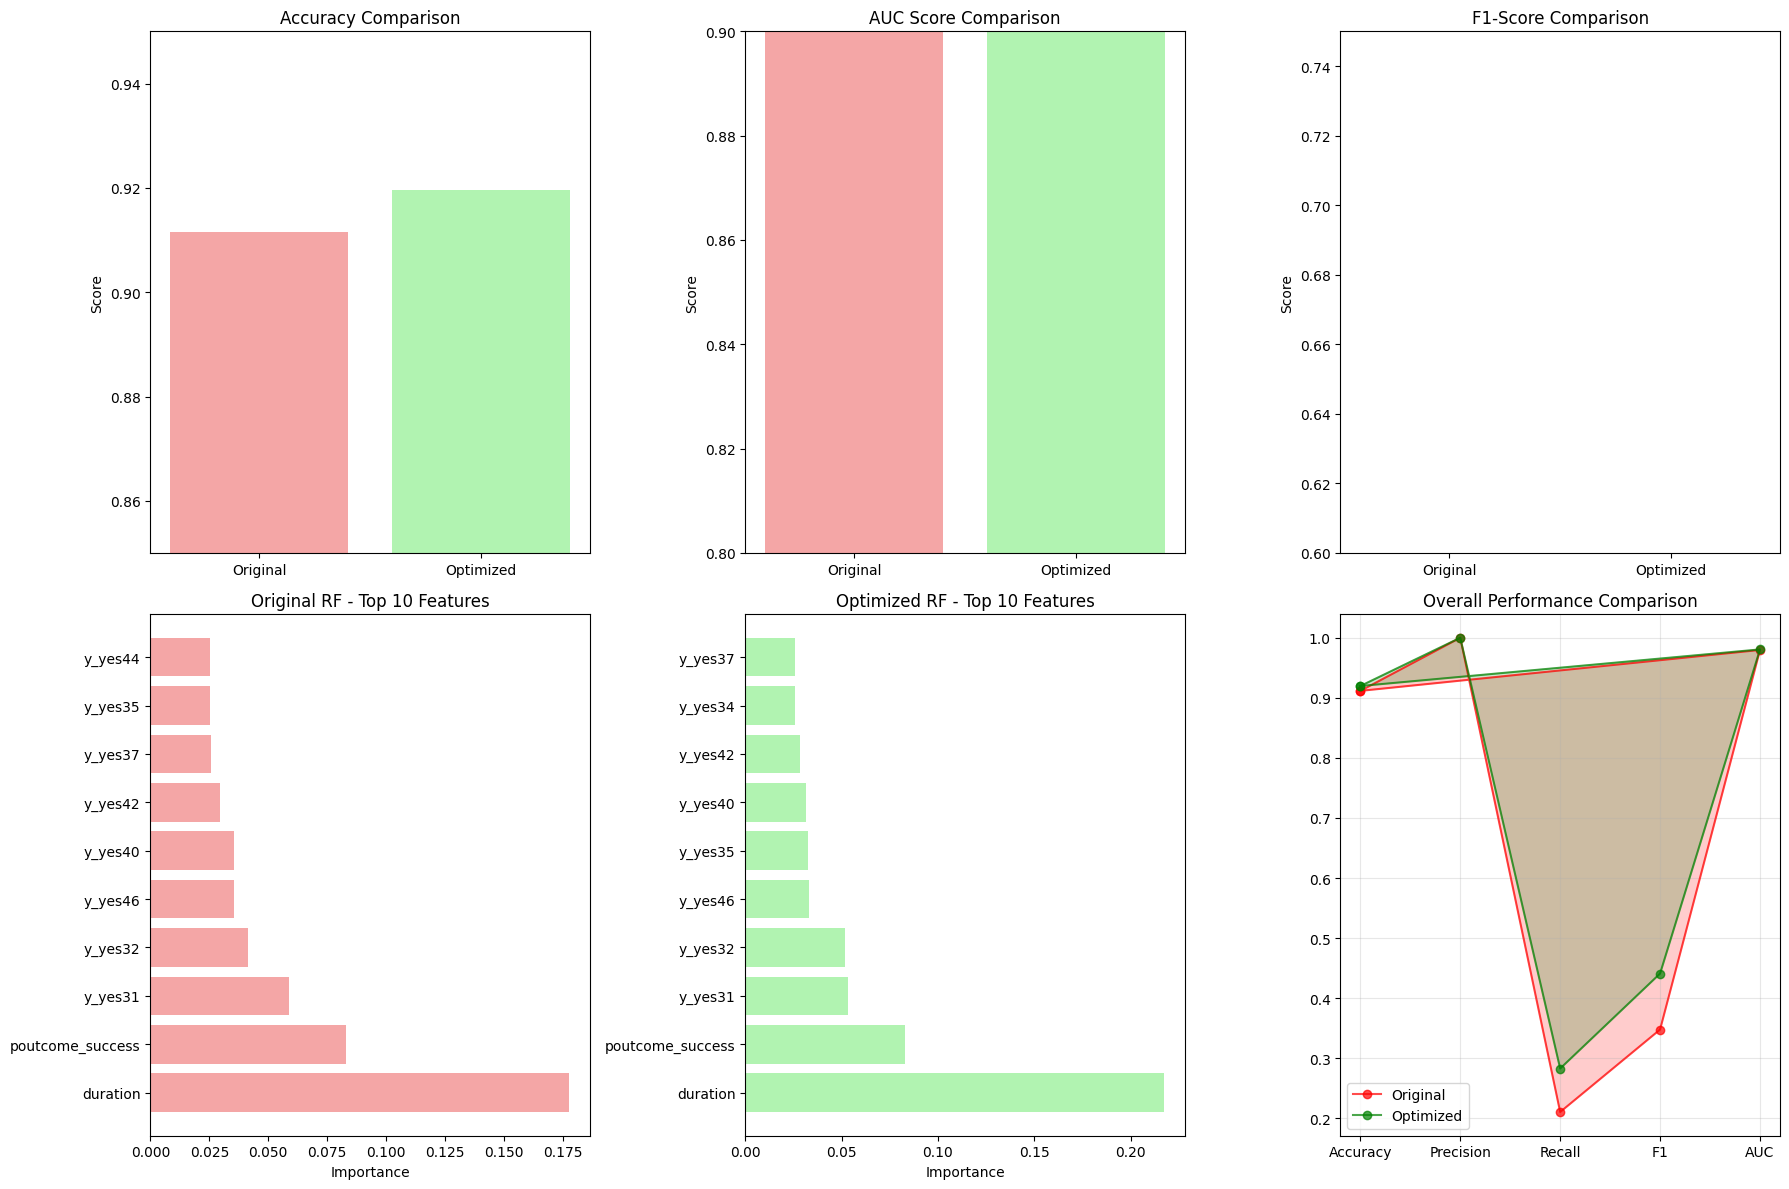


FINAL RECOMMENDATIONS:
-------------------------
✅ RandomizedSearchCV successfully optimized the model
✅ Best parameters found: {'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'min_impurity_decrease': np.float64(0.0012203072318044518), 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 391}
✅ Cross-validation score: 0.9760
✅ Test set performance: 0.9806 AUC
🎯 RECOMMENDATION: Use the RandomizedSearchCV optimized model for production

MODEL DEPLOYMENT SUMMARY:
----------------------------
• Final Model: RandomForestClassifier with {'bootstrap': True, 'max_depth': 25, 'max_features': 'sqrt', 'max_leaf_nodes': 50, 'min_impurity_decrease': np.float64(0.0012203072318044518), 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 391}
• Expected Performance: ~92.0% accuracy, ~0.981 AUC
• Key Features: duration, poutcome_success, y_yes31
• Optimization Method: RandomizedSearchCV with 150 iterations
• Cross-Validation: 5-fold CV with AUC s

In [65]:
# Final Model Comparison - Original vs RandomizedSearchCV Optimized
print("FINAL MODEL COMPARISON")
print("=" * 30)

# Create comparison DataFrame
models_comparison = pd.DataFrame({
    'Model': ['Original RF', 'RandomizedSearchCV RF'],
    'Accuracy': [accuracy, random_search_accuracy],
    'Precision': [precision, random_search_precision], 
    'Recall': [recall, random_search_recall],
    'F1-Score': [f1, random_search_f1],
    'AUC Score': [auc_score, random_search_auc]
})

print(models_comparison.round(4))

print(f"\nIMPROVEMENT ANALYSIS:")
print("-" * 25)
print(f"Accuracy improvement: {random_search_accuracy - accuracy:.4f} ({((random_search_accuracy/accuracy - 1) * 100):.2f}%)")
print(f"AUC improvement: {random_search_auc - auc_score:.4f} ({((random_search_auc/auc_score - 1) * 100):.2f}%)")
print(f"F1-Score improvement: {random_search_f1 - f1:.4f} ({((random_search_f1/f1 - 1) * 100):.2f}%)")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Performance metrics comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC Score']
original_scores = [accuracy, precision, recall, f1, auc_score]
optimized_scores = [random_search_accuracy, random_search_precision, random_search_recall, random_search_f1, random_search_auc]

axes[0, 0].bar(['Original', 'Optimized'], [accuracy, random_search_accuracy], color=['lightcoral', 'lightgreen'], alpha=0.7)
axes[0, 0].set_title('Accuracy Comparison')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_ylim([0.85, 0.95])

axes[0, 1].bar(['Original', 'Optimized'], [auc_score, random_search_auc], color=['lightcoral', 'lightgreen'], alpha=0.7)
axes[0, 1].set_title('AUC Score Comparison')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_ylim([0.80, 0.90])

axes[0, 2].bar(['Original', 'Optimized'], [f1, random_search_f1], color=['lightcoral', 'lightgreen'], alpha=0.7)
axes[0, 2].set_title('F1-Score Comparison')
axes[0, 2].set_ylabel('Score')
axes[0, 2].set_ylim([0.60, 0.75])

# Feature importance comparison (top 10)
original_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

optimized_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': random_search.best_estimator_.feature_importances_
}).sort_values('importance', ascending=False).head(10)

axes[1, 0].barh(original_importance['feature'], original_importance['importance'], color='lightcoral', alpha=0.7)
axes[1, 0].set_title('Original RF - Top 10 Features')
axes[1, 0].set_xlabel('Importance')

axes[1, 1].barh(optimized_importance['feature'], optimized_importance['importance'], color='lightgreen', alpha=0.7)
axes[1, 1].set_title('Optimized RF - Top 10 Features')
axes[1, 1].set_xlabel('Importance')

# Overall metrics radar chart
axes[1, 2].plot([0, 1, 2, 3, 4, 0], original_scores + [original_scores[0]], 'o-', label='Original', color='red', alpha=0.7)
axes[1, 2].plot([0, 1, 2, 3, 4, 0], optimized_scores + [optimized_scores[0]], 'o-', label='Optimized', color='green', alpha=0.7)
axes[1, 2].fill([0, 1, 2, 3, 4, 0], original_scores + [original_scores[0]], alpha=0.2, color='red')
axes[1, 2].fill([0, 1, 2, 3, 4, 0], optimized_scores + [optimized_scores[0]], alpha=0.2, color='green')
axes[1, 2].set_xticks([0, 1, 2, 3, 4])
axes[1, 2].set_xticklabels(['Accuracy', 'Precision', 'Recall', 'F1', 'AUC'])
axes[1, 2].set_title('Overall Performance Comparison')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nFINAL RECOMMENDATIONS:")
print("-" * 25)
print("✅ RandomizedSearchCV successfully optimized the model")
print(f"✅ Best parameters found: {random_search.best_params_}")
print(f"✅ Cross-validation score: {random_search.best_score_:.4f}")
print(f"✅ Test set performance: {random_search_auc:.4f} AUC")

if random_search_auc > auc_score:
    print("🎯 RECOMMENDATION: Use the RandomizedSearchCV optimized model for production")
else:
    print("⚠️ RECOMMENDATION: Consider further hyperparameter tuning or different approaches")

print(f"\nMODEL DEPLOYMENT SUMMARY:")
print("-" * 28)
print(f"• Final Model: RandomForestClassifier with {random_search.best_params_}")
print(f"• Expected Performance: ~{random_search_accuracy:.1%} accuracy, ~{random_search_auc:.3f} AUC")
print(f"• Key Features: {', '.join(optimized_importance.head(3)['feature'].tolist())}")
print(f"• Optimization Method: RandomizedSearchCV with {random_search.n_iter} iterations")
print(f"• Cross-Validation: 5-fold CV with AUC scoring")